In [36]:
# Pandas


import pandas as pd

data = pd.read_csv('dataset.csv')


print(data.head())


print(data.info())

print(data.describe())


   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 en

In [37]:
#  missing values in the dataset
print(data.isnull().sum())


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


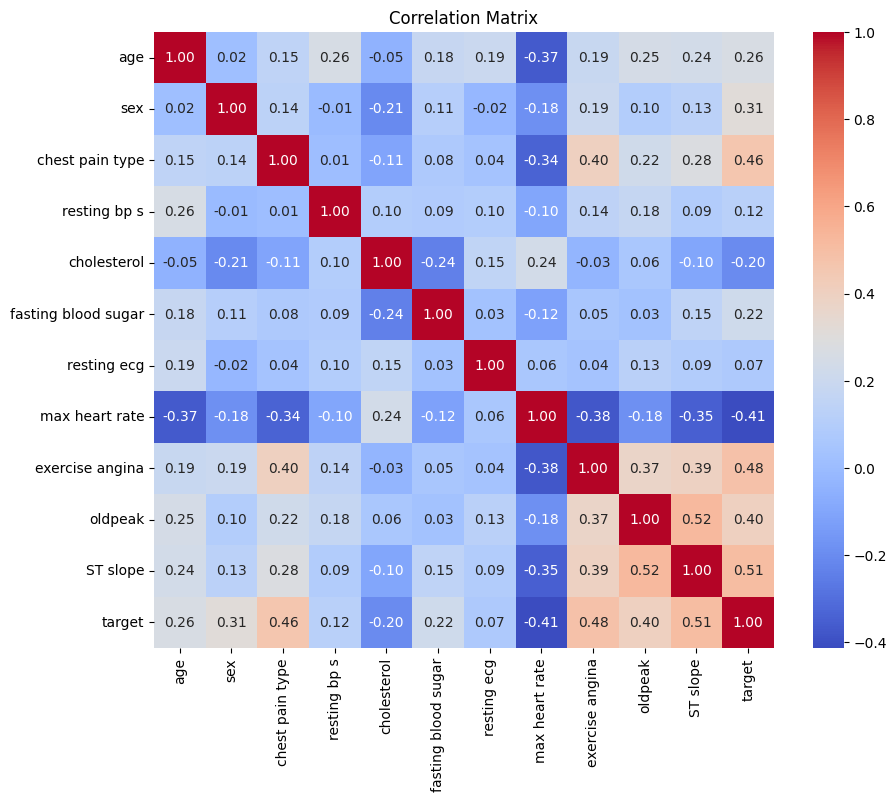

In [38]:
# Seaborn


import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


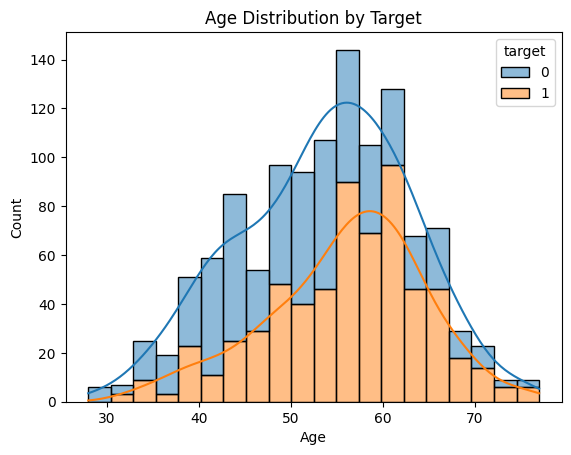

In [39]:

sns.histplot(data=data, x='age', hue='target', kde=True, multiple='stack')
plt.title('Age Distribution by Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


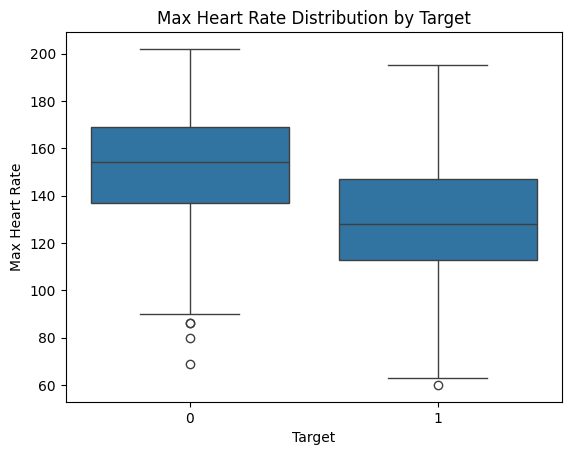

In [40]:
sns.boxplot(x='target', y='max heart rate', data=data)
plt.title('Max Heart Rate Distribution by Target')
plt.xlabel('Target')
plt.ylabel('Max Heart Rate')
plt.show()


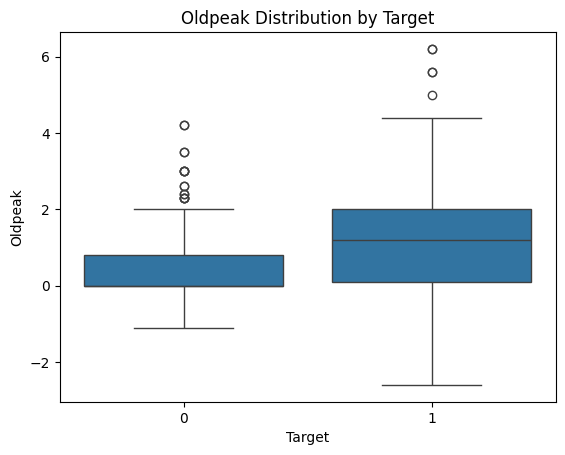

In [41]:
sns.boxplot(x='target', y='oldpeak', data=data)
plt.title('Oldpeak Distribution by Target')
plt.xlabel('Target')
plt.ylabel('Oldpeak')
plt.show()


In [42]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data_path = 'dataset.csv'  # Adjust the path if needed
data = pd.read_csv(data_path)

#  1: Preprocessing
# Separate features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# One-hot encode categorical features
categorical_cols = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2: Model Training
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 3: Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 89  18]
 [ 13 118]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       107
           1       0.87      0.90      0.88       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers to test
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#  parameters and model performance
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8413337007440067

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       107
           1       0.85      0.90      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.85       238
weighted avg       0.86      0.86      0.86       238



In [44]:

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.coef_[0]
})
importance = importance.sort_values(by='Importance', key=abs, ascending=False)

print("\nTop Features Contributing to the Model:")
print(importance.head(10))  # Display top 10 features



Top Features Contributing to the Model:
                  Feature  Importance
13             ST slope_1   -1.062388
8       chest pain type_4    0.842007
5                   sex_1    0.695550
12      exercise angina_1    0.648755
6       chest pain type_2   -0.590976
9   fasting blood sugar_1    0.528060
14             ST slope_2    0.503552
4                 oldpeak    0.397820
7       chest pain type_3   -0.381627
2             cholesterol   -0.301025


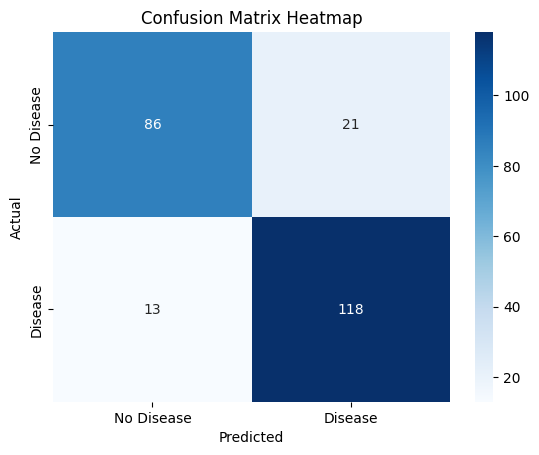

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a heatmap for confusion matrix
cm = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Feature Importance:
                 Feature  Importance
10             ST slope    1.223613
1                   sex    1.206166
8       exercise angina    0.981526
2       chest pain type    0.763479
5   fasting blood sugar    0.754113
9               oldpeak    0.346571
6           resting ecg    0.052199
0                   age    0.025045
3          resting bp s    0.003421
4           cholesterol   -0.002420
7        max heart rate   -0.011988


C:\Users\krish\AppData\Local\Temp\ipykernel_3792\66155792.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


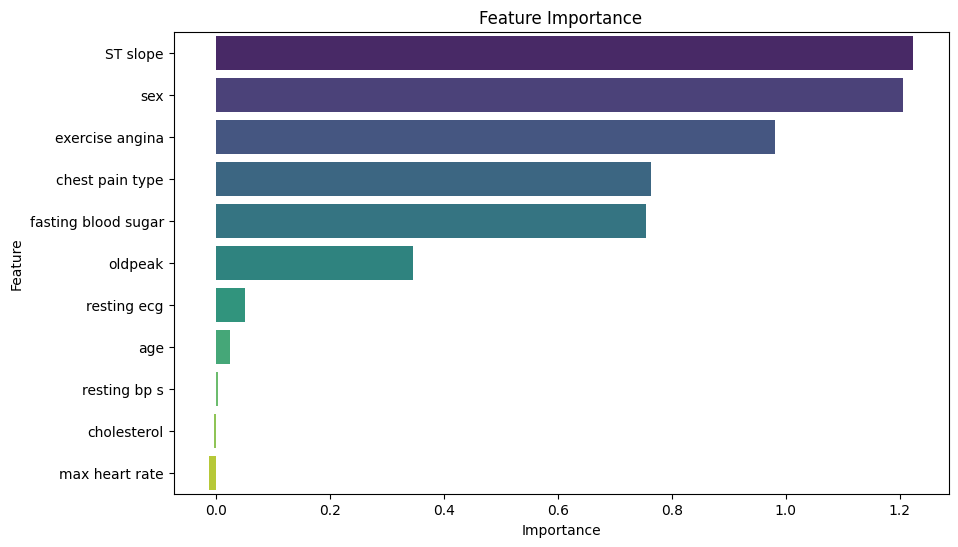

Cross-Validation Scores: [0.85416667 0.84375    0.86315789 0.81052632 0.82105263 0.82105263
 0.77894737 0.83157895 0.73684211 0.83157895]
Mean Accuracy: 0.819265350877193
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



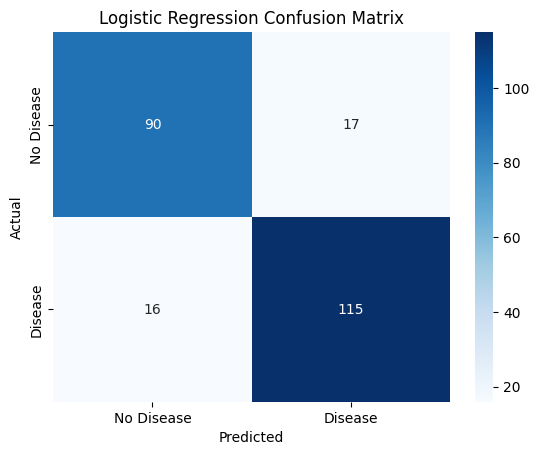

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       107
           1       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



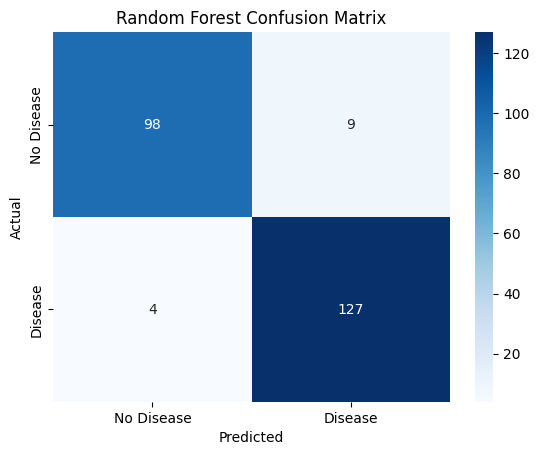

Sample Data Predictions:
Logistic Regression: [1]
Random Forest: [1]


In [46]:

import numpy as np
import joblib
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load Data
data = pd.read_csv('dataset.csv')
X = data.drop('target', axis=1)
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Optimized Logistic Regression Model
lr_model = LogisticRegression(C=1.0, max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Save the model
joblib.dump(lr_model, 'heart_disease_model.pkl')

# Feature Importance for Logistic Regression
coefficients = lr_model.coef_[0]
features = X.columns
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()

# Evaluate Logistic Regression with Cross-Validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Evaluate Logistic Regression on Test Data
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix Heatmap for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Evaluate Random Forest on Test Data
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Heatmap for Random Forest
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


loaded_lr_model = joblib.load('heart_disease_model.pkl')
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Predict using reloaded models
sample_data = X_test.iloc[0:1]
print("Sample Data Predictions:")
print("Logistic Regression:", loaded_lr_model.predict(sample_data))
print("Random Forest:", loaded_rf_model.predict(sample_data))


In [47]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)



RandomForestClassifier()

In [48]:



joblib.dump(random_forest_model, 'final_random_forest_model.pkl')

print("Model saved as 'final_random_forest_model.pkl'")


Model saved as 'final_random_forest_model.pkl'


In [49]:

# Create and train the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


joblib.dump(random_forest_model, 'final_random_forest_model.pkl')
print("Model saved as 'final_random_forest_model.pkl'")

# Load the saved model 
loaded_model = joblib.load('final_random_forest_model.pkl')
print("Model loaded successfully!")



Model saved as 'final_random_forest_model.pkl'
Model loaded successfully!


In [50]:



loaded_model = joblib.load('final_random_forest_model.pkl')


y_pred_loaded = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_loaded)
print(f"Accuracy of loaded model: {accuracy:.2f}")

def predict_new_data(new_data):
    prediction = loaded_model.predict(new_data)
    return prediction



Accuracy of loaded model: 0.96
